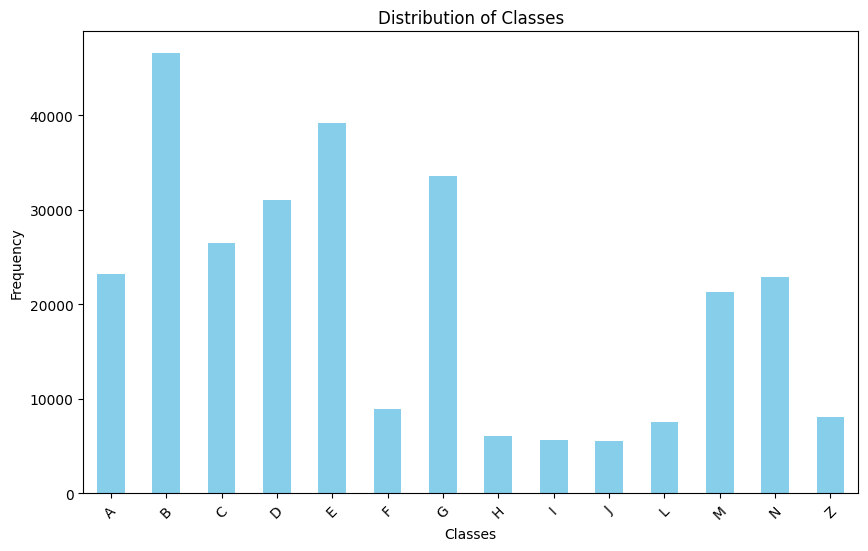

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import LongformerTokenizer, LongformerModel, LongformerConfig
from transformers import DistilBertTokenizer, DistilBertModel, DistilBertConfig
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/kaggle/input/comp-7/comp_1.csv")

# Concatenate title and abstract text
texts = df['Title'] + " " + df['abstractText']
texts = texts.astype(str)
labels = df[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'L', 'M', 'N', 'Z']]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Split dataset into train, validation, and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2)
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=0.1)

class_counts = labels.sum(axis=0)

# Plot a bar graph to visualize the distribution of classes
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Classes')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Approach

1. Data loading and dividing into train test validation set.
2. Concat of title and abstract and label of 14 one hot vectors as output.
3. Encode the input data using respective encoder of the models.
4. Finetuned using single FC layer in the end using BCE loss .
5. Tested on different models (Distilbert - To shorten the time , Longformer - To not trim the long abstract , Biobert - To make use of pretraining on medical dataset )

# Result & Comparison

Dataset is imbalaced , so using micro as accruracy parameter Biobert has outperformed Distilbert and Longform.